# RESULTS OF RANDOM FOREST IN THE DATASET

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV, cross_val_score,  RandomizedSearchCV
from sklearn.pipeline import Pipeline

from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

In [3]:
data=pd.read_csv('data_CVD.csv') #Import Data

X = data.drop('cardio',axis=1) # Features

y= data.cardio # Target


In [3]:
data.head(10)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,newvalues_height,newvalues_weight,New_values_BMI
0,18393,2,110.0,80.0,1,1,0,0,1,0,168.0,62.0,21.0
1,20228,1,140.0,90.0,3,1,0,0,1,1,156.0,85.0,34.0
2,18857,1,130.0,70.0,3,1,0,0,0,1,165.0,64.0,23.0
3,17623,2,150.0,100.0,1,1,0,0,1,1,169.0,82.0,28.0
4,17474,1,100.0,60.0,1,1,0,0,0,0,156.0,56.0,23.0
5,21914,1,120.0,80.0,2,2,0,0,0,0,151.0,67.0,29.0
6,22113,1,130.0,80.0,3,1,0,0,1,0,157.0,93.0,37.0
7,22584,2,130.0,90.0,3,3,0,0,1,1,178.0,95.0,29.0
8,17668,1,110.0,70.0,1,1,0,0,1,0,158.0,71.0,28.0
9,19834,1,110.0,60.0,1,1,0,0,0,0,164.0,68.0,25.0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100) #Create training and test sets

In [5]:
rfc = RandomForestClassifier() #Create model

In [6]:
dir(rfc)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'decision_path',
 'estimator_params',
 'feature_importances_',
 'fit',
 'get_params',
 'max_depth

<b> First model try without Hyperparameter tunning </b>

In [7]:
# Random forest model creation
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [8]:
print(f"Accuray on test set:{round(rfc.score(X_test,y_test),2)}")
# round(accuracy_score(y_test1, y_pred1),2) you get the same value using this agorithm for accuracy

Accuray on test set:0.71


In [9]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Confusion Matrix ===
[[7623 2917]
 [3138 7315]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.71      0.72      0.72     10540
           1       0.71      0.70      0.71     10453

    accuracy                           0.71     20993
   macro avg       0.71      0.71      0.71     20993
weighted avg       0.71      0.71      0.71     20993





In [10]:
Basic_rfc_auc = roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1])
fpr_Basic_rfc, tpr_Basic_rfc, thresholds_Basic_rfc = roc_curve(y_test,rfc.predict_proba(X_test)[:,1])

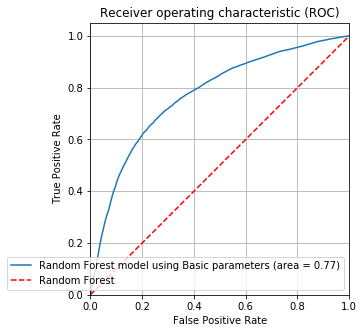

In [11]:
fig,ax = plt.subplots(figsize=(5,5))
ax.set_aspect("equal")
ax.plot(fpr_Basic_rfc, tpr_Basic_rfc,
         label=f'Random Forest model using Basic parameters (area = {round(Basic_rfc_auc,2)})')
plt.plot([0, 1], [0, 1],'r--', label="Random Forest")
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('RFC_BASICHPT')
plt.show()

<b> This is the baseline selected to improve: <b/>
    
Accuracy: 0.71 &nbsp;
AUC=0.77 &nbsp;
Precision= 0.72 &nbsp;
Recall = 0.70 &nbsp;
F1 Score= 0.71 

<b> First try with hiperparameter tunning <b/>

In [15]:
data=pd.read_csv('data_CVD.csv') #Import Data

X = data.drop('cardio',axis=1) # Features

y= data.cardio # Target


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100) 

In [17]:
rfc = RandomForestClassifier()

In [18]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [19]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [20]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [21]:
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 47.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 205.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 375.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [23]:
Mejores_parametros=rf_random.best_params_

In [25]:
Mejores_parametros2=rf_random.best_estimator_

In [26]:
rf_random.cv_results_

{'mean_fit_time': array([ 42.71621442, 124.29232987, 104.03049755, 283.40549326,
         96.63860345, 114.58693345, 155.43456403,  98.30702813,
        197.45483589, 154.69570518,  35.85213105, 129.02187014,
        174.09866524, 137.84887616, 117.265534  , 245.47147806,
         89.09053405, 102.04728071, 287.9249874 ,  66.70132224,
        278.38089919, 264.12191868, 135.08237243, 192.4653554 ,
        229.18276628,  68.46944022, 255.6709768 , 100.86283763,
        282.58896502, 118.61751183, 156.50339866, 124.74910816,
        132.74214578,  76.21608051, 181.8203148 , 106.65687275,
        118.73324585,  92.7109402 ,  82.7167395 , 104.90105899,
         12.71223728,  59.07003681,  75.73661391,  36.78436216,
         30.75416287, 116.11322292, 211.51041285,  54.12861673,
        162.92345619,  90.98216128, 265.77359406, 295.36768802,
        139.35969067, 137.27028672, 214.38223139,  82.04988313,
        102.03562299, 190.49249625, 164.71061007, 143.05841494,
         23.58666825,  

In [27]:
df=pd.DataFrame(rf_random.cv_results_)

In [53]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,42.716214,0.477478,4.417126,0.088312,400,5,1,sqrt,30,True,"{'n_estimators': 400, 'min_samples_split': 5, ...",0.726727,0.726053,0.724812,0.725864,0.000793,65
1,124.292330,0.287419,10.738731,1.374406,2000,5,1,sqrt,10,True,"{'n_estimators': 2000, 'min_samples_split': 5,...",0.738302,0.735301,0.732345,0.735316,0.002432,8
2,104.030498,0.490638,6.365292,0.241828,1200,5,2,sqrt,10,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.737690,0.735914,0.731794,0.735133,0.002470,11
3,283.405493,9.970705,36.894931,11.433326,2000,2,4,auto,30,False,"{'n_estimators': 2000, 'min_samples_split': 2,...",0.731810,0.729973,0.726772,0.729518,0.002082,45
4,96.638603,1.478536,7.798655,0.151380,1600,2,4,sqrt,10,True,"{'n_estimators': 1600, 'min_samples_split': 2,...",0.738241,0.736649,0.732896,0.735929,0.002241,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,55.936247,0.186950,3.899662,0.108485,400,10,2,auto,40,False,"{'n_estimators': 400, 'min_samples_split': 10,...",0.727095,0.724767,0.722729,0.724864,0.001783,73
96,82.519366,0.356559,5.242009,0.177435,1000,2,1,auto,10,False,"{'n_estimators': 1000, 'min_samples_split': 2,...",0.737261,0.735608,0.731916,0.734928,0.002234,13
97,26.686808,0.160838,1.816795,0.074033,200,5,4,auto,100,False,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.730708,0.729606,0.725363,0.728559,0.002304,61
98,199.391129,1.376841,23.384952,0.298021,2000,2,2,sqrt,20,True,"{'n_estimators': 2000, 'min_samples_split': 2,...",0.734750,0.732729,0.729589,0.732356,0.002123,29


In [32]:
df.to_csv('Results_of_fist_RandomizedSearch.csv') # Save the results of first Randomized Search

In [33]:
Mejores_parametros #Best parameter

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [34]:
rf_random.best_score_ #Score producced by the parameter

0.7361328805104872

In [36]:
Information_first_tunning= { 'Model': Mejores_parametros,
                             'Model_':Mejores_parametros2,
                             'Accuracy': rf_random.best_score_}

In [32]:
Information_first_tunning


NameError: name 'Information_first_tunning' is not defined

In [44]:
f = open("Information_first_tunning","w") #Save model and hyperparameters as document 
f.write( str(Information_first_tunning))
f.close()

In [47]:
#Apply model hyperparameters into the test features
predictions_Hpt = Mejores_parametros2.predict(X_test)

In [49]:
print(f"Accuray on test set:{round(Mejores_parametros2.score(X_test,y_test),2)}")
# round(accuracy_score(y_test1, y_pred1),2) you get the same value using this agorithm for accuracy

Accuray on test set:0.73


In [50]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions_Hpt))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions_Hpt))
print('\n')

=== Confusion Matrix ===
[[8227 2313]
 [3266 7187]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10540
           1       0.76      0.69      0.72     10453

    accuracy                           0.73     20993
   macro avg       0.74      0.73      0.73     20993
weighted avg       0.74      0.73      0.73     20993





In [51]:
Basic_rfc_hpt = roc_auc_score(y_test,Mejores_parametros2.predict_proba(X_test)[:,1])
fpr_hpt_rfc, tpr_hpt_rfc, thresholds_hpt_rfc = roc_curve(y_test,Mejores_parametros2.predict_proba(X_test)[:,1])

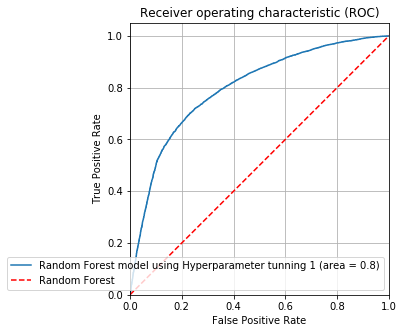

In [52]:
fig,ax = plt.subplots(figsize=(5,5))
ax.set_aspect("equal")
ax.plot(fpr_hpt_rfc, tpr_hpt_rfc,
         label=f'Random Forest model using Hyperparameter tunning 1 (area = {round(Basic_rfc_hpt,2)})')
plt.plot([0, 1], [0, 1],'r--', label="Random Forest")
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('RFC_HPT1')
plt.show()

<b> Performance of the model VS the baseline : <b/>


 

Accuracy: 0.73 - 0.71 = 0.02 of improvement &nbsp;  
AUC=0.8 - 0.77 =0.03 of improvement &nbsp;  
Precision= 0.76 - 0.72 = 0.04 of improvement &nbsp;  
Recall = 0.69 - 0.70 = -0.01 &nbsp;  
F1 Score= 0.72 - 0.71 of improvement 

<b> Second try with hiperparameter tunning <b/>

In [9]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.3, random_state = 100) 

In [10]:
param_grid2 = {
    'bootstrap': [True],
    'max_depth': [3,5, 10, 100, 110, 120],
    'max_features': ['sqrt'],
    'min_samples_leaf': [3, 4, 6,7,9],
    'min_samples_split': [8, 10,14],
    'n_estimators': [100, 200, 300]}

In [11]:
param_grid2

{'bootstrap': [True],
 'max_depth': [3, 5, 10, 100, 110, 120],
 'max_features': ['sqrt'],
 'min_samples_leaf': [3, 4, 6, 7, 9],
 'min_samples_split': [8, 10, 14],
 'n_estimators': [100, 200, 300]}

In [12]:
rfc2 = RandomForestClassifier()

In [13]:
rf_random2 = RandomizedSearchCV(estimator = rfc2, param_distributions = param_grid2, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random2.fit(X_train1,y_train1)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 17.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [3, 5, 10, 100, 110, 120],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [3, 4, 6, 7, 9],
                                        'min_samples_split': [8, 10, 14],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [14]:
Mejores_parametros3=rf_random2.best_estimator_

In [15]:
Mejores_parametros3

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=7,
                       min_samples_split=10)

In [16]:
rf_random2.best_score_ #Score producced by the parameter

0.7361328680067638

In [18]:
Information_second_tunning= { 
                             'Model_':Mejores_parametros3,
                             'Accuracy': rf_random2.best_score_}

In [19]:
f = open("Information_second_tunning","w") #Save model and hyperparameters as document 
f.write( str(Information_second_tunning))
f.close()

In [21]:
#Apply model hyperparameters into the test features
predictions_Hpt2 = Mejores_parametros3.predict(X_test1)

In [22]:
print(f"Accuray on test set:{round(Mejores_parametros3.score(X_test1,y_test1),2)}")
# round(accuracy_score(y_test1, y_pred1),2) you get the same value using this agorithm for accuracy

Accuray on test set:0.73


In [23]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test1, predictions_Hpt2))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test1, predictions_Hpt2))
print('\n')

=== Confusion Matrix ===
[[8222 2318]
 [3259 7194]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10540
           1       0.76      0.69      0.72     10453

    accuracy                           0.73     20993
   macro avg       0.74      0.73      0.73     20993
weighted avg       0.74      0.73      0.73     20993





In [24]:
Basic_rfc_hpt2 = roc_auc_score(y_test1,Mejores_parametros3.predict_proba(X_test1)[:,1])
fpr_hpt_rfc2, tpr_hpt_rfc2, thresholds_hpt_rfc2 = roc_curve(y_test1,Mejores_parametros3.predict_proba(X_test1)[:,1])

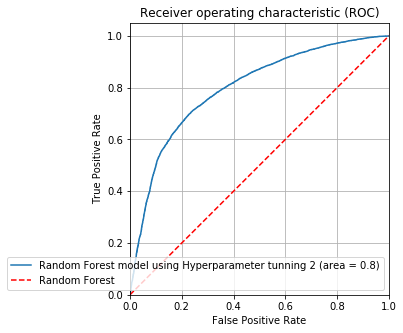

In [25]:
fig,ax = plt.subplots(figsize=(5,5))
ax.set_aspect("equal")
ax.plot(fpr_hpt_rfc2, tpr_hpt_rfc2,
         label=f'Random Forest model using Hyperparameter tunning 2 (area = {round(Basic_rfc_hpt2,2)})')
plt.plot([0, 1], [0, 1],'r--', label="Random Forest")
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('RFC_HPT2')
plt.show()